## Observations and Insights 

* Tumor volume and mouse weight have a positive linear correlation.
* Sample size is pretty evenly distributed, about similar amount of mice got tested for each drug, and about half of them are male and half are female.
* For drug Capomulin, the one mouse selected below shows that the drug starts to show effectiveness after about 20 days.


In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice.
print(len(combined_df['Mouse ID'].unique()))

249


In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_df.duplicated(['Mouse ID','Timepoint'], keep=False)
duplicates_df = pd.DataFrame(duplicates).reset_index()
dup = duplicates.loc[duplicates_df[0]==True]

In [65]:
# Optional: Get all the data for the duplicate mouse ID
dupkeys = dup.keys()
duplicates = combined_df.loc[dupkeys]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = pd.DataFrame(combined_df.loc[combined_df['Mouse ID']!='g989'])

In [67]:
# Checking the number of mice in the clean DataFrame.
micecount = len(cleaned_df['Mouse ID'].unique())
micecount

248

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_group = cleaned_df.groupby('Drug Regimen')
tv_mean = mouse_group['Tumor Volume (mm3)'].mean()
tv_median = mouse_group['Tumor Volume (mm3)'].median()
tv_variance = mouse_group['Tumor Volume (mm3)'].var()
tv_STD = mouse_group['Tumor Volume (mm3)'].std()
tv_SEM = mouse_group['Tumor Volume (mm3)'].sem()

summary_df1 = pd.DataFrame({'Mean': tv_mean,'Median':tv_median,'Variance':tv_variance, 'TV_STD':tv_STD,'TV SEM':tv_SEM})
summary_df1



,Mean,Median,Variance,TV_STD,TV SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = mouse_group['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

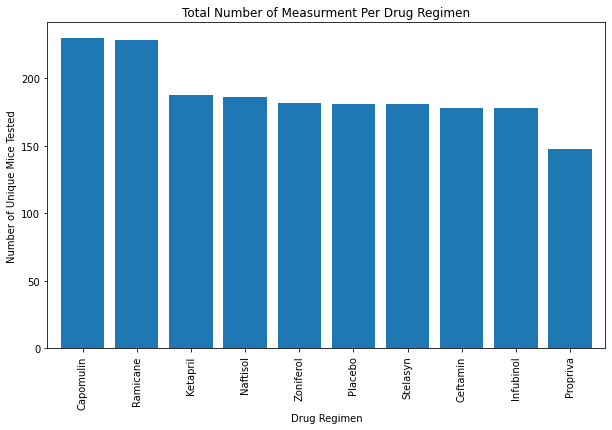

In [84]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
x_axis = cleaned_df['Drug Regimen'].unique()
y_axis = cleaned_df['Drug Regimen'].value_counts()
bar_df = pd.DataFrame({'count': y_axis})
bar = bar_df.plot(kind="bar", figsize=(10,6),legend=False, rot=90,width=0.8)
# Set a title,labels for the chart
bar.set_title("Total Number of Measurment Per Drug Regimen")
bar.set_xlabel('Drug Regimen')
bar.set_ylabel('Number of Unique Mice Tested')
plt.show()

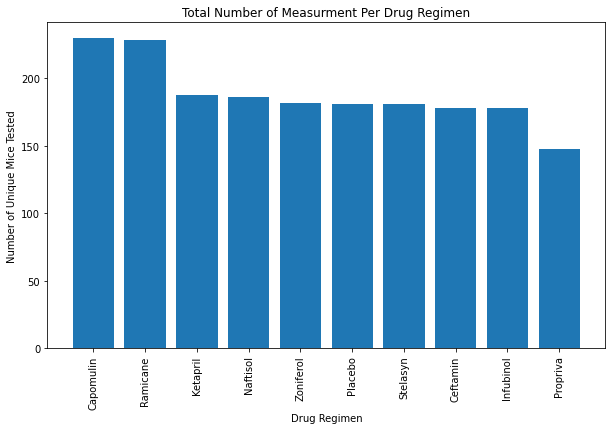

In [85]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(0,len(bar_df))
tick_locations = []
bar_df_plt = bar_df.reset_index()
for x in x_axis:
    tick_locations.append(x)
plt.figure(figsize=(10,6))
plt.bar(tick_locations, bar_df['count'], align="center")
plt.xticks(tick_locations, bar_df_plt['index'], rotation="vertical")
plt.title("Total Number of Measurment Per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.show()

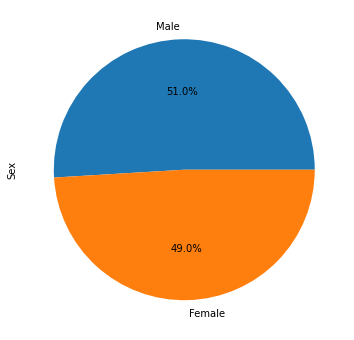

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
members = cleaned_df['Sex'].value_counts()
members.plot(kind ='pie', figsize = (11, 6),autopct="%1.1f%%")
plt.show()

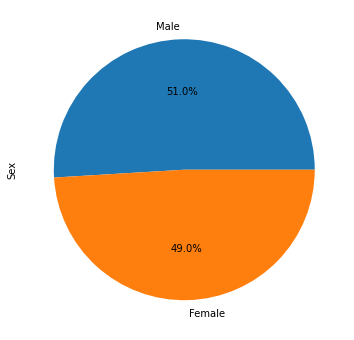

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(11,6))
plt.pie(members,autopct="%1.1f%%", labels = ['Male','Female'])
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimenremoved_df = cleaned_df.loc[(cleaned_df['Drug Regimen']=='Ramicane')|(cleaned_df['Drug Regimen']=='Ceftamin')
                                                  |(cleaned_df['Drug Regimen']=='Capomulin')|(cleaned_df['Drug Regimen']=='Infubinol')]
finalv_mouse_regimens = regimenremoved_df.sort_values(['Mouse ID','Timepoint'], ascending = False).groupby('Mouse ID').head(1)
finalv_mouse_regimens.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
84,z578,Ramicane,Male,11,16,45,30.638696,0
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tv = finalv_mouse_regimens.loc[finalv_mouse_regimens['Drug Regimen']==treatment,['Tumor Volume (mm3)']]
    # add subset
    tumor_vol.append(tv['Tumor Volume (mm3)'])  
for i in range(0,4):
    #tumor_vol_df = pd.DataFrame(tumor_vol[i])
    #tumor_tv = tumor_vol_df['Tumor Volume (mm3)']
    #Determine outliers using upper and lower bounds
    quartiles = tumor_vol[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(treatments[i])
    print(f"The lower quartile of {treatments[i]} is: {lowerq}")
    print(f"The upper quartile of {treatments[i]} is: {upperq}")
    print(f"The interquartile range of {treatments[i]} is: {iqr}")
    print(f"The the median of {treatments[i]} is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("------------------------------------------------")

Capomulin
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------------
Ramicane
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------------
Infubinol
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 

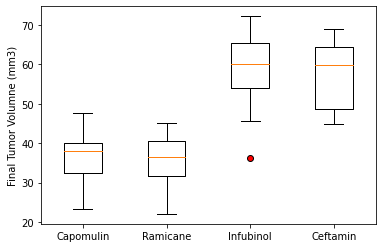

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin, Ramicane, Infubinol, and Ceftamin
fig, ax = plt.subplots()
ax.boxplot(tumor_vol,flierprops=dict(markerfacecolor='r', label='not shown'))
ax.set_ylabel('Final Tumor Volumne (mm3)')
ax.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

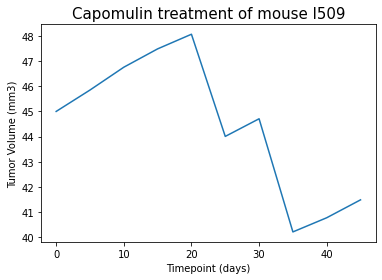

In [97]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin')&(cleaned_df['Mouse ID'] == 'l509')]
plt.plot(mouse_id['Timepoint'],mouse_id['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse I509', fontsize = 15)
plt.show()

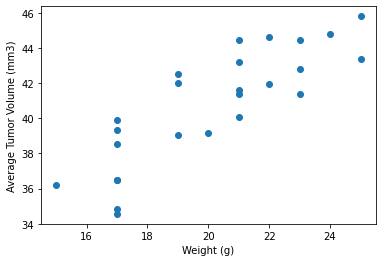

In [96]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_treatment = capomulin.groupby('Mouse ID')
capomulin_treatment_df = pd.DataFrame()
capomulin_treatment_df['Tumor Volumne'] = capomulin_treatment['Tumor Volume (mm3)'].mean()
capomulin_treatment_df['Weight'] = capomulin_treatment['Weight (g)'].mean()
plt.scatter(capomulin_treatment_df['Weight'], capomulin_treatment_df['Tumor Volumne'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

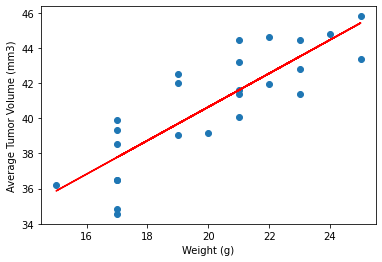

In [98]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_treatment_df['Weight']
y_values = capomulin_treatment_df['Tumor Volumne']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()